<h1><center>EDSA - Climate Change Belief Analysis 2021</center></h1>

# Table Of Contents

* [1. Introduction](#Intro)
     - [1.1 Context](#Context)
     - [1.2 Problem Statement](#Proble_Statement)
     - [1.3 Data Description](#Datasets)
* [2. Data Cleaning and Exploration](#EDA)
    - [2.1 Importing Libraries](#Import_Libraries)
    - [2.2 Load and Examine Data](#Examine_Data)
    - [2.3 Exploratory Data Analysis](#Exploratory_Data_Analysis) 
    - [2.4 Data Cleaning](#Cleaning_Data)
* [3. Feature Selection](#Feature_Selection)
    - [3.1 Additional Pre-Processing](#Additional_Pre_Processing)
    - [3.2 Exploratory Data Analysis On Clean Data](#Exploratory_Data_Analysis_On_Clean_Data)
* [4. Model Fitting](#Model_Fitting)
    - [4.1 Test Base Model](#Test_Base_Model)
    - [4.2 Training Models](#Training_Models)
    - [4.3 Model Evaluation](#Model_Evaluation)
* [5. Predictive Modelling](#Predictive_Modelling)
    - [5.1 An Overview of Models](#Overview_of_Models)
    - [5.2 Explanation of Pipeline](#Explaning_Pipeline)
    - [5.3 Create a Pipeline to Vectorize Data](#Pipeline_to_Vectorize_Data)
    - [5.4 Predictions and Analysis](#Predictions_and_Analysis)
* [6. Preparation of submission data](#Preparation_of_submission_data)

## 1. Introduction
### 1.1 Context
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

### 1.2 Problem Statement
With this context, we are given a classification challenge to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### 1.3 Data Description
#### 1.3.1 Data Source
Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

<table style="width:90%">
  <tr>
      <th>Class</th>
      <th>Description</th>
  </tr>
  <tr>
      <td>-1</td>
      <td><b>Anti:</b> the tweet does not believe in man-made climate change</td>
  </tr>
  <tr>
      <td>0</td>
      <td><b>Neutral:</b> the tweet neither supports nor refutes the belief of man-made climate change </td>
  </tr>
  <tr>
      <td>1</td>
      <td><b>Pro:</b> the tweet supports the belief of man-made climate change</td>
  </tr>
  <tr>
      <td>2</td>
      <td><b>News:</b> the tweet links to factual news about climate change</td> 
  </tr>
</table>

#### 1.3.2 Data Input Files
* train.csv - the dataset to train our model(s)
* test.csv - the dataset to evaluate our model(s)
* sample_submission.csv - an example of what our submission file should look like

#### 1.3.3 Variable Defintions
* sentiment : Sentiment of tweet
* message : Tweet body
* tweetid : Twitter unique id

## 2. Data Cleaning and Exploration

### 2.1 Importing Libraries

In [1]:
# Import packages 

# Data Analysis and Wrangling
import pandas as pd
import numpy as np
from tqdm import tqdm

# Natural Language and text processing tools
import re
import string
import emoji
import gensim
import spacy
import sklearn.feature_extraction.text
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter

# Enhanced Natural Language and text processing tools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# Processing data to prior to trainig and fitting to model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set plot style for data visualisation
sns.set()
# for improved aesthetics
plt.style.use('ggplot')    

# Importing wordcloud for plotting word clouds and 
from wordcloud import WordCloud
# textwrap for wrapping longer text
from textwrap import wrap

# Machine Learning model versioning
from comet_ml import Experiment

# Machine learning model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

C:\Users\Sanele Zulu\.conda\envs\tensorflow\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package punkt to C:\Users\Sanele
[nltk_data]     Zulu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sanele
[nltk_data]     Zulu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.2 Load and Examine Data

In [2]:
# Load training data
train_data = pd.read_csv('train.csv')

# Load testing data
test_data = pd.read_csv('test.csv')

# Load sample submission data
sample_submission_data = pd.read_csv('sample_submission.csv')

In [3]:
# View head of training data
train_data.head(5)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
# View head of testing data
test_data.head(5)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
# Training data metadata and dimensions
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The info() function above shows us that there is no column that has null values.

In [6]:
# View Class labels
train_data['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [7]:
# Value count for each class
train_data['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Value count above shows us that there is a class imbalance, but we will show that visually on the next section.

### 2.3 Exploratory Data Analysis

Exploratory data analysis allows us to have a look at our data and the relationships between aspects of the data. We can firstly look at the distribution of the sentiments.

In [8]:
# Calculate class proportion and check if all classes sum up to 1
anti_class = len(train_data.loc[train_data['sentiment'] == -1])/len(train_data)
neutral_class = len(train_data.loc[train_data['sentiment'] ==0])/len(train_data)
pro_class = len(train_data.loc[train_data['sentiment'] ==1])/len(train_data)
news_class = len(train_data.loc[train_data['sentiment'] ==2])/len(train_data)

total = anti_class + neutral_class + pro_class + news_class
total == 1

True

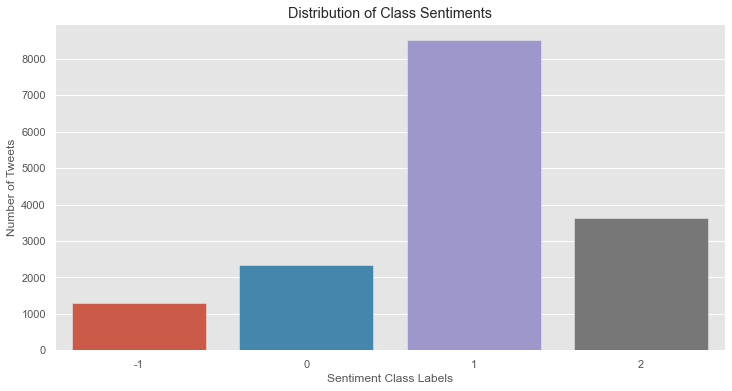

In [9]:
# Set figure size for distribution of class imbalance
fig = plt.subplots(figsize = (12, 6))

# Create ditribution bar graph 
graph = sns.countplot(x = 'sentiment', data = train_data)

# Give title and plot
plt.title('Distribution of Class Sentiments')
plt.xlabel('Sentiment Class Labels')
plt.ylabel('Number of Tweets')
plt.show(graph)

We can clearly see that there are far more tweets in the sentiment category '1', corresponding to those who do believe in climate change. We can get a better idea of distributions through a pie chart.

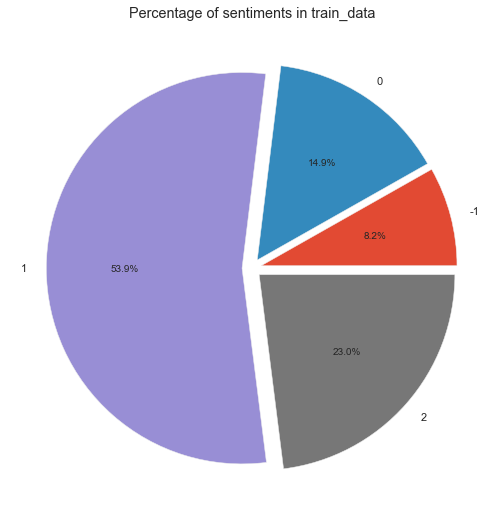

In [10]:
senti = train_data.groupby('sentiment', as_index=False).count()
fig = plt.subplots(figsize=(14,9))
plt.pie(senti['message'], labels = senti['sentiment'].astype('str'), autopct='%1.1f%%', explode = [0.05, 0.05, 0.05, 0.05])
plt.title('Percentage of sentiments in train_data')
plt.show()

The pie chart shows clearly that over 50% of our dataset is comprised of those who do believe in climate change. This is indicative of unbalanced data. However, we will keep the ratios between the sentiment categories the same, as this may be an indication of real-life ratios that exist and so would be more generalisable to other data.

### 2.4 Data Cleaning

The next objectives will examine a first version of text cleaning using a highly manual text preprocessing method that works but is deliberately poor in our first iteration.

This aims to demonstrate that text cleaning in natural language processing may be an iterative process determined by the context of data required for the machine learning issue at hand. This section will demonstrate a step-by-step method to using some of the text cleaning tools accessible to us.

Further down in the notebook, a more simplified approach will be taken once we understand the steps involved and how each step prepares our data for further data exploration and makes it usable for our prediction model for this particular problem, which involves multiclass classification within the range of those who believe and do not believe in climate change.

#### Retweets

Twitter is an excellent platform for spreading a message. And because of the Retweet tradition, tweets may rapidly go viral. As a result of the high amount of Retweets in our data, this may provide us with an indicator of the virality and emotion of specific classes of tweets.

In [11]:
# Check duplicate messages in the training data
dupl_train = train_data['message']
dupl_train = train_data[dupl_train.isin(dupl_train[dupl_train.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the training data and to see that each message is unique
dupl_tweet_id = train_data['tweetid']
train_data[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# Check for duplicate messages in the testing data
dupl_test = test_data['message']
dupl_test = test_data[dupl_test.isin(dupl_test[dupl_test.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the testing data and to see that each message is unique
dupl_tweet_id = train_data['tweetid']
test_data[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# View percentage of duplicates in our datasests
dupl_train_prop = (len(dupl_train)/len(train_data['message']))*100
dupl_test_prop = (len(dupl_test)/len(test_data['message']))*100
print('Train data percentange of Retweets:',str(round((dupl_train_prop),3))+"%")
print('Test data percentage of Retweets:',str(round((dupl_test_prop),3))+"%")

Train data percentange of Retweets: 12.061%
Test data percentage of Retweets: 11.037%


In [12]:
dupl_test.head(7)

,message,tweetid
5094,How can people be so ignorant when it comes to...,618984
9691,How can people be so ignorant when it comes to...,353129
960,Obamas fiddled global warming data: *Shameless...,818493
4866,Obamas fiddled global warming data: *Shameless...,122281
3341,RT @1followernodad: ok a climate change denier...,543287
4978,RT @1followernodad: ok a climate change denier...,176463
9601,RT @1followernodad: ok a climate change denier...,345248


After examining the data, it was determined that 12% of the train data and 11% of our test data include duplicates. The percentage of duplicate messages is comparable across both data sets. Additionally, a retweet seems to be nearly invariably linked with a message that has a '@' reference.

In [13]:
# Removing non-ASCII strings, e.g. by Ã¢â‚¬Â¦
train_data['message'] = train_data['message'].apply(lambda x: x.split('Ã¢â‚¬Â¦')[0])

In [14]:
# Removing URL's
train_data['message'] = train_data['message'].apply(lambda x: re.sub(r"\bhttps://t.co/\w+", '', x))

In [15]:
# Removing Line Breaks
train_data['message'] = train_data['message'].replace('\n', ' ')

In [16]:
# Removing capital letters and punctuations
train_data['message'] = train_data['message'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [17]:
# Dictionary of Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have", "it's": "it is" ,
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "we’ ve": "we have", "imvotingbecause": "i am voting because", "rt": ""}

# Finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text, contractions_dict = contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_data['message'] = train_data['message'].apply(lambda x:expand_contractions(x))

In [18]:
# Convert uppercase to lowercase
train_data['message'] = train_data['message'].apply(lambda x: x.lower())

In [19]:
# Removing numbers and words with numbers
train_data['message'] = train_data['message'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [20]:
# Removing punctuation
train_data['message'] = train_data['message'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [21]:
# Removing extra spaces
train_data['message'] = train_data['message'].apply(lambda x: re.sub(' +',' ',x))

In [22]:
# Function to remove emoji's
def give_emoji_free_text(text):
    
    all_chars = [str for str in text]
    emoji_list = [c for c in all_chars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

    return clean_text

# Removing emoji's
full_text_list = []

for index, rows in train_data['message'].iteritems():
    rows = give_emoji_free_text(rows) 
    full_text_list.append(rows)
    
train_data['message'] = full_text_list

In [23]:
# Removing non-ASCII strings if it persists, e.g. by iã¢â‚¬â¦
train_data['message'] = train_data['message'].apply(lambda x: x.split('iã¢â‚¬â¦')[0])

In [24]:
# View head of cleaned training data
train_data.head(5)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon di...,625221
1,1,it s not like we lack evidence of anthropogeni...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired was a pivotal year in the w...,573736
4,1,rt soynoviodetodas it s and a racist sexist cl...,466954


#### Lemmatization

In [25]:
# Loading model
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

# Lemmatization with stopwords removal
train_data['lemmatized'] = train_data['lemmatized'] = train_data['message'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))
train_data.head(5)

,sentiment,message,tweetid,lemmatized
0,1,polyscimajor epa chief doesn t think carbon di...,625221,polyscimajor epa chief doesn t think carbon di...
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researcher year act climate change...
3,1,todayinmaker wired was a pivotal year in the w...,573736,todayinmaker wire pivotal year war climate change
4,1,rt soynoviodetodas it s and a racist sexist cl...,466954,rt soynoviodetoda s racist sexist climate chan...


While cleaning text may be time consuming, there are faster methods to do it. The above procedure demonstrates the considerations that must be made, but as we continue with our notebook, we will examine easier approaches.

#### Additional Exploratory Data Analysis

<AxesSubplot:>

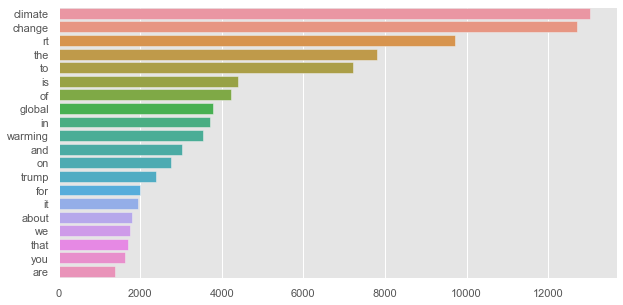

In [26]:
# Visualize current state of data
# Function returns a unigram
def top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_unigram = top_tweet_unigrams(train_data['message'])[:20]
x,y = map(list,zip(*top_tweet_unigram))
sns.barplot(x=y, y=x)

<AxesSubplot:>

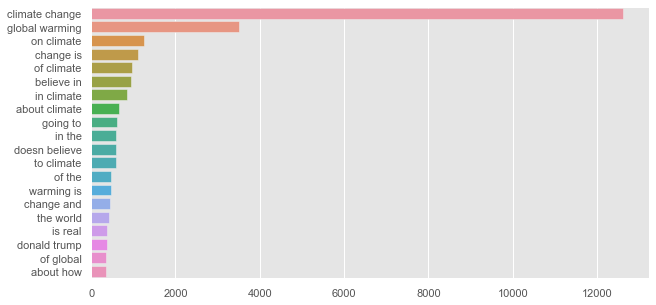

In [27]:
# Function returns a bigram
def top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigram = top_tweet_bigrams(train_data['message'])[:20]
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(x=y,y=x)

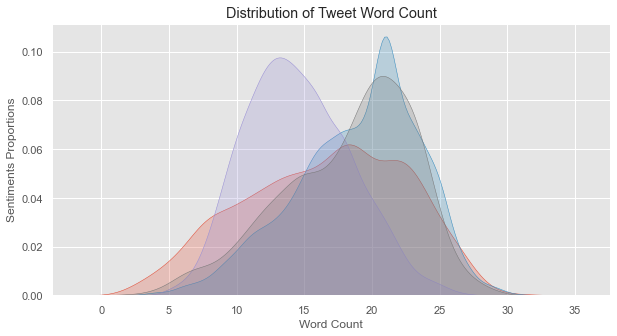

In [28]:
# Column for the number of words in tweet
train_data['word_count'] = train_data['message'].apply(lambda x: len(x.split()))

# Split so we can use updated train set with new feature
train_data = train_data[:len(train_data)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == -1], shade = True, label = 'Anti')

# Set title and plot
plt.title('Distribution of Tweet Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiments Proportions')
plt.show()

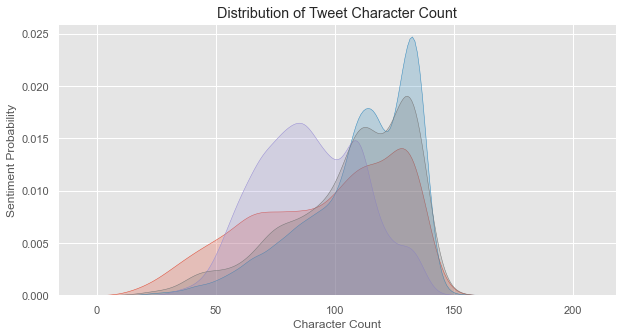

In [29]:
# Column for the number of characters in a tweet
train_data['character_count'] = train_data['message'].apply(lambda x: len(x))

# Split so we can use updated train set with new feature
train_data = train_data[:len(train_data)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == -1], shade = True, label = 'Anti')


# Set title and plot
plt.title('Distribution of Tweet Character Count')
plt.xlabel('Character Count')
plt.ylabel('Sentiment Probability')
plt.show()

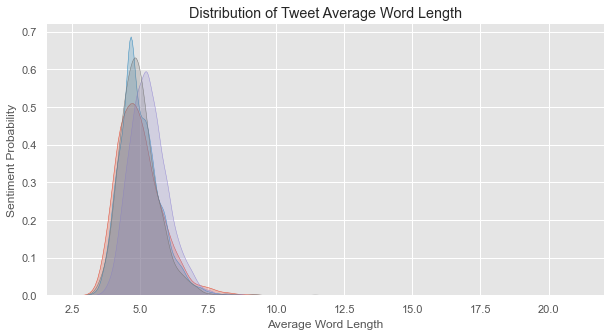

In [30]:
#Function to find average word length 
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

# Broadcast to text column
train_data['average_word_length'] = train_data['message'].apply(average_word_length)

# Split so we can use updated train set with new feature
train_data = train_data[:len(train_data)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == -1], shade = True, label = 'Anti')

# Set title
plt.title('Distribution of Tweet Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Sentiment Probability')

# Plot graphs
plt.show()

The visualizations above illustrate the probability characteristics of each class of tweets, which may be helpful for feature engineering reasons when developing the features for our machine learning model.

## 3. Feature Selection

Feature selection is the process of extracting features from raw data using data mining methods and domain expertise. These characteristics may be used to boost the performance of machine learning algorithms. Feature selection may be seen of as an application of machine learning in and of itself.

### 3.1 Additiional Pre-Processing

After exploring the data, it will be prepared for machine learning. In general, the following method must be described in order to process text:

raw text corpus -> processing text -> tokenized text -> corpus vocabulary -> text representation

The majority of the work can be done automatically using Keras's Tokenize object, which transforms all words to lowercase and removes punctuation. This tokenizer includes many arguments that enable you to do the majority of the cleaning with a single line of code, which means that we do not need to perform as much processing ourselves.

#### Pre-Processing Functions

In [31]:
# Remove punctuation
def remove_punctuation(message):
    return message.translate(str.maketrans('', '', string.punctuation))

# Remove stopwords
StopWords = stopwords
def remove_stopwords(message):
    return ' '.join([i for i in message.split() if i not in StopWords])

# Remove words less than 4 
def remove_less_than(message):
    return ' '.join([i for i in message.split() if len(i) > 3])

# Remove words with non-alphabet characters
def remove_non_alphabet(message):
    return ' '.join([i for i in message.split() if i.isalpha() == True])

# Stem words
stemmer = SnowballStemmer('english')
def stem_words(message):
    return stemmer.stem(message)

# Lemmatize words for verb
lemmatizer = WordNetLemmatizer()
def lemmatize_words_verb(message):
    return lemmatizer.lemmatize(message, 'v')

In [32]:
# Function to remove all the contractions from the text
def correct_contraction(message):
   
    message = str(message).lower()
    message = re.sub(r"he's", "he is", message)
    message = re.sub(r"there's", "there is", message)
    message = re.sub(r"We're", "We are", message)
    message = re.sub(r"That's", "That is", message)
    message = re.sub(r"won't", "will not", message)
    message = re.sub(r"they're", "they are", message)
    message = re.sub(r"Can't", "Cannot", message)
    message = re.sub(r"wasn't", "was not", message)
    message = re.sub(r"aren't", "are not", message)
    message = re.sub(r"isn't", "is not", message)
    message = re.sub(r"What's", "What is", message)
    message = re.sub(r"i'd", "I would", message)
    message = re.sub(r"should've", "should have", message)
    message = re.sub(r"where's", "where is", message)
    message = re.sub(r"we'd", "we would", message)
    message = re.sub(r"i'll", "I will", message)
    message = re.sub(r"weren't", "were not", message)
    message = re.sub(r"They're", "They are", message)
    message = re.sub(r"let's", "let us", message)
    message = re.sub(r"it's", "it is", message)
    message = re.sub(r"can't", "cannot", message)
    message = re.sub(r"don't", "do not", message)
    message = re.sub(r"you're", "you are", message)
    message = re.sub(r"i've", "I have", message)
    message = re.sub(r"that's", "that is", message)
    message = re.sub(r"i'll", "I will", message)
    message = re.sub(r"doesn't", "does not", message)
    message = re.sub(r"i'd", "I would", message)
    message = re.sub(r"didn't", "did not", message)
    message = re.sub(r"ain't", "am not", message)
    message = re.sub(r"you'll", "you will", message)
    message = re.sub(r"I've", "I have", message)
    message = re.sub(r"Don't", "do not", message)
    message = re.sub(r"I'll", "I will", message)
    message = re.sub(r"I'd", "I would", message)
    message = re.sub(r"Let's", "Let us", message)
    message = re.sub(r"you'd", "You would", message)
    message = re.sub(r"It's", "It is", message)
    message = re.sub(r"Ain't", "am not", message)
    message = re.sub(r"Haven't", "Have not", message)
    message = re.sub(r"Could've", "Could have", message)
    message = re.sub(r"youve", "you have", message)
    message = re.sub(r"haven't", "have not", message)
    message = re.sub(r"hasn't", "has not", message)
    message = re.sub(r"There's", "There is", message)
    message = re.sub(r"He's", "He is", message)
    message = re.sub(r"It's", "It is", message)
    message = re.sub(r"You're", "You are", message)
    message = re.sub(r"I'M", "I am", message)
    message = re.sub(r"shouldn't", "should not", message)
    message = re.sub(r"wouldn't", "would not", message)
    message = re.sub(r"i'm", "I am", message)
    message = re.sub(r"I'm", "I am", message)
    message = re.sub(r"Isn't", "is not", message)
    message = re.sub(r"Here's", "Here is", message)
    message = re.sub(r"you've", "you have", message)
    message = re.sub(r"we're", "we are", message)
    message = re.sub(r"what's", "what is", message)
    message = re.sub(r"couldn't", "could not", message)
    message = re.sub(r"we've", "we have", message)
    message = re.sub(r"who's", "who is", message)
    message = re.sub(r"y'all", "you all", message)
    message = re.sub(r"would've", "would have", message)
    message = re.sub(r"it'll", "it will", message)
    message = re.sub(r"we'll", "we will", message)
    message = re.sub(r"We've", "We have", message)
    message = re.sub(r"he'll", "he will", message)
    message = re.sub(r"Y'all", "You all", message)
    message = re.sub(r"Weren't", "Were not", message)
    message = re.sub(r"Didn't", "Did not", message)
    message = re.sub(r"they'll", "they will", message)
    message = re.sub(r"they'd", "they would", message)
    message = re.sub(r"DON'T", "DO NOT", message)
    message = re.sub(r"they've", "they have", message)
    
    #correct some acronyms 
    message = re.sub(r"nba", "National Basketball Association", message)
    message = re.sub(r"azwx", "Arizona Weather", message)  
    message = re.sub(r"alwx", "Alabama Weather", message)
    message = re.sub(r"wordpressdotcom", "wordpress", message)      
    message = re.sub(r"gawx", "Georgia Weather", message)  
    message = re.sub(r"scwx", "South Carolina Weather", message)  
    message = re.sub(r"cawx", "California Weather", message)
    message = re.sub(r"usNWSgov", "United States National Weather Service", message) 
    message = re.sub(r"epa", "Environmental Protection Agency", message)
    message = re.sub(r"okwx", "Oklahoma City Weather", message)
    message = re.sub(r"rt", "retweet", message)
    message = re.sub(r"ny", "New York", message)
    message = re.sub(r"arwx", "Arkansas Weather", message)  
  
    return message

train_data['message'] = train_data['message'].apply(correct_contraction)

In [33]:
# Funtion to remove all the URL's that exist in the text
def remove_URL(message):
    
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',message)

train_data['message'] = train_data['message'].apply(lambda x: remove_URL(x))

In [34]:
# Function to remove all the line breaks that exist in the text
def line_break(message):
  
    break_line = message.replace('\n', ' ')
    return break_line
 
train_data['message'] = train_data['message'].apply(lambda x : line_break(x))

In [35]:
# Function to remove HTML tags
def remove_html(message):

    html=re.compile(r'<.*?>')
    return html.sub(r'',message)

train_data['message'] = train_data['message'].apply(lambda x : remove_html(x))

In [36]:
# Function to remove emojis in Unicode
def remove_emoji(message):
 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', message)

train_data['message'] = train_data['message'].apply(lambda x: remove_emoji(x)) 

In [37]:
# Function to remove punctuation
def remove_punct(text):
  
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

train_data['message'] = train_data['message'].apply(lambda x: remove_punct(x).lower())

In [38]:
# Remove numbers from text
train_data['message'] = train_data['message'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))

In [39]:
# Remove extra spaces
train_data['message'] = train_data['message'].apply(lambda x: re.sub(' +',' ',x))

In [40]:
# Remove undetected punctuations and unusual alphabets
train_data['message']=train_data['message'].apply(lambda x: re.sub('[“”‘’—…ã¢â‚„¬â¦€]',' ',x))

In [41]:
train_data.head(3)

,sentiment,message,tweetid,lemmatized,word_count,character_count,average_word_length
0,1,polyscimajor environmental protection agency c...,625221,polyscimajor epa chief doesn t think carbon di...,19,110,4.842105
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming,11,62,4.727273
2,2,retweet rawstory researchers say we have three...,698562,rt rawstory researcher year act climate change...,18,95,4.333333


### 3.2 Exploratory Data Analysis On Clean Data

The various Sentiment tweets are grouped according to their sentiment descriptions to determine what they have in common.

In [42]:
# Function to cluster tweets
def get_cluster(sentiment):

    if sentiment == -1:
        return 'Anti'
    elif sentiment ==0:
        return 'Neutral'
    elif sentiment == 1:
        return 'Pro'
    else:
        return 'News'

train_data['Class']= train_data['sentiment'].apply(get_cluster)

In [43]:
train_data.head(3)

,sentiment,message,tweetid,lemmatized,word_count,character_count,average_word_length,Class
0,1,polyscimajor environmental protection agency c...,625221,polyscimajor epa chief doesn t think carbon di...,19,110,4.842105,Pro
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming,11,62,4.727273,Pro
2,2,retweet rawstory researchers say we have three...,698562,rt rawstory researcher year act climate change...,18,95,4.333333,News


#### Polarity

Polarity Indicates whether a text is positive or negative. It is a float value in the range [-1, 1], where 1 indicates a positive statement, -1 indicates a negative statement, and 0 indicates neutrality.

It simply refers to the expression of emotions in a phrase. Sentiments and emotions are inextricably linked. Typically, the strength of a feeling or viewpoint is related to the intensity of certain emotions, such as pleasure or rage.

In [44]:
from textblob import TextBlob
# Function to get polarity
def Get_polarity(text):
  
    return TextBlob(text).sentiment.polarity 

train_data['Polarity']= train_data['message'].apply(Get_polarity)

train_data.head()

,sentiment,message,tweetid,lemmatized,word_count,character_count,average_word_length,Class,Polarity
0,1,polyscimajor environmental protection agency c...,625221,polyscimajor epa chief doesn t think carbon di...,19,110,4.842105,Pro,0.083333
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming,11,62,4.727273,Pro,0.000000
2,2,retweet rawstory researchers say we have three...,698562,rt rawstory researcher year act climate change...,18,95,4.333333,News,-0.300000
3,1,todayinmaker wired was a pivotal year in the w...,573736,todayinmaker wire pivotal year war climate change,12,66,4.583333,Pro,0.500000
4,1,retweet soynoviodetodas it s and a racist sexi...,466954,rt soynoviodetoda s racist sexist climate chan...,18,110,5.166667,Pro,0.000000


#### Subjectivity

Subjectivity indicates the subjective or opinionated nature of a text. Sentences usually relate to subjective opinions, emotions, or judgments, while objective information is factual. 

Subjectivity is defined as the interval between [0,1]. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [45]:
# Function to get subjectivity
def Get_subjectivity(text):

    return TextBlob(text).sentiment.subjectivity 

train_data['Subjectivity']= train_data['message'].apply(Get_subjectivity)

train_data.head()

,sentiment,message,tweetid,lemmatized,word_count,character_count,average_word_length,Class,Polarity,Subjectivity
0,1,polyscimajor environmental protection agency c...,625221,polyscimajor epa chief doesn t think carbon di...,19,110,4.842105,Pro,0.083333,0.166667
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming,11,62,4.727273,Pro,0.000000,0.000000
2,2,retweet rawstory researchers say we have three...,698562,rt rawstory researcher year act climate change...,18,95,4.333333,News,-0.300000,0.600000
3,1,todayinmaker wired was a pivotal year in the w...,573736,todayinmaker wire pivotal year war climate change,12,66,4.583333,Pro,0.500000,0.800000
4,1,retweet soynoviodetodas it s and a racist sexi...,466954,rt soynoviodetoda s racist sexist climate chan...,18,110,5.166667,Pro,0.000000,0.000000


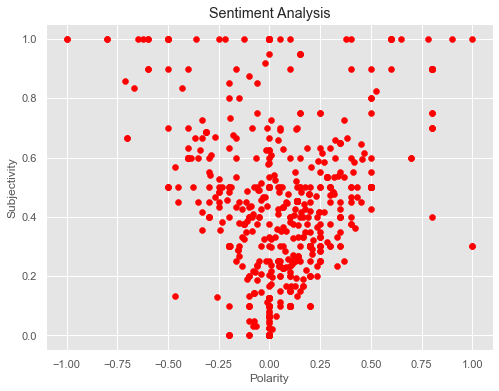

In [46]:
#Plot the Subjectivity vs the Polarity
plt.figure(figsize=(8,6))
plt.scatter(train_data['Polarity'][:1000], train_data['Subjectivity'][:1000], color = 'red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
# Analysis of this plot???

#### Word Cloud

Word Cloud also known as Text Cloud, it is a representation in which more precise words emerge. It is a method for determining the most frequently occurring terms in a given text.

In [47]:
Pro_tweets = " ".join(train_data[train_data['Class']=='Pro'].message)
News_tweets = " ".join(train_data[train_data['Class']=='News'].message)
Anti_tweets = " ".join(train_data[train_data['Class']=='Anti'].message)
Neu_tweets = " ".join(train_data[train_data['Class']=='Neutral'].message) 

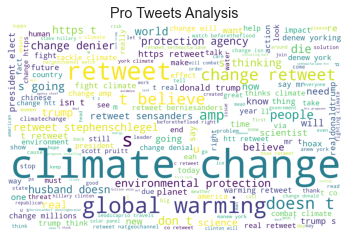

In [48]:
# Pro tweets
wordcloud = WordCloud(height=1050, width=1700, random_state= 21, max_font_size= 200, background_color='white')
wordcloud = wordcloud.generate(Pro_tweets)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Pro Tweets Analysis')
plt.show()

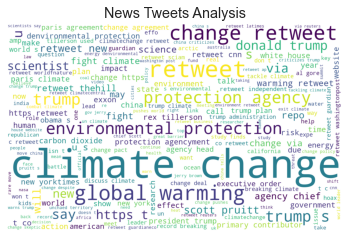

In [49]:
# News tweets
wordcloud = WordCloud(height=1050, width=1700, random_state= 21, max_font_size= 200, background_color='white')
wordcloud = wordcloud.generate(News_tweets)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('News Tweets Analysis')
plt.show()

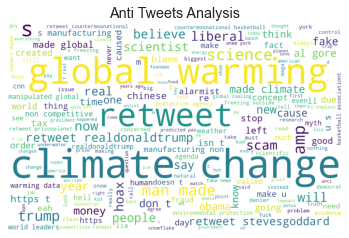

In [50]:
# Anti tweets
wordcloud = WordCloud(height=1050, width=1700, random_state= 21, max_font_size= 200, background_color='white')
wordcloud = wordcloud.generate(Anti_tweets)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Anti Tweets Analysis')
plt.show()

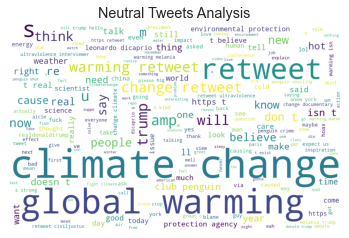

In [51]:
# Neutral tweets
wordcloud = WordCloud(height=1050, width=1700, random_state= 21, max_font_size= 200, background_color='white')
wordcloud = wordcloud.generate(Neu_tweets)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Neutral Tweets Analysis')
plt.show()

In [52]:
# Using word_tokenizer to tokenize the clean texts
train_data['Tokens'] = train_data['message'].apply(lambda word: word_tokenize(word))
train_data.head()

,sentiment,message,tweetid,lemmatized,word_count,character_count,average_word_length,Class,Polarity,Subjectivity,Tokens
0,1,polyscimajor environmental protection agency c...,625221,polyscimajor epa chief doesn t think carbon di...,19,110,4.842105,Pro,0.083333,0.166667,"[polyscimajor, environmental, protection, agen..."
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming,11,62,4.727273,Pro,0.000000,0.000000,"[it, s, not, like, we, lack, evidence, of, ant..."
2,2,retweet rawstory researchers say we have three...,698562,rt rawstory researcher year act climate change...,18,95,4.333333,News,-0.300000,0.600000,"[retweet, rawstory, researchers, say, we, have..."
3,1,todayinmaker wired was a pivotal year in the w...,573736,todayinmaker wire pivotal year war climate change,12,66,4.583333,Pro,0.500000,0.800000,"[todayinmaker, wired, was, a, pivotal, year, i..."
4,1,retweet soynoviodetodas it s and a racist sexi...,466954,rt soynoviodetoda s racist sexist climate chan...,18,110,5.166667,Pro,0.000000,0.000000,"[retweet, soynoviodetodas, it, s, and, a, raci..."


#### Bag of Words

Bag of Words is a technique for extracting features from texts. These characteristics may be utilized to train algorithms for machine learning. It generates a vocabulary from all the unique terms found in the training dataset.

In [53]:
'''
    Function takes in a list of words and returns a dictionary 
    with each word as a key, and the value represents the number of 
    times that word appeared   
'''
def bag_of_words_count(words, word_dict={}):
    
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

bag_words = {}
for pp in train_data['sentiment']:
    df = train_data.groupby('sentiment')
    bag_words[pp] = {}
    for row in train_data['Tokens'][:1000]:
        bag_words[pp] = bag_of_words_count(row, bag_words[pp])

In [54]:
import collections
# Function returns the word count that exists only in Pro sentiment
def count_words(input):
  
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

train_data[(train_data.Class== 'Pro')][['Tokens']].apply(count_words)['Tokens'].most_common(20)

[('climate', 7407),
 ('change', 7262),
 ('retweet', 5809),
 ('the', 4835),
 ('to', 4351),
 ('is', 2864),
 ('a', 2752),
 ('of', 2616),
 ('in', 2453),
 ('s', 2442),
 ('t', 2163),
 ('and', 1922),
 ('global', 1605),
 ('warming', 1466),
 ('on', 1378),
 ('we', 1359),
 ('it', 1235),
 ('about', 1153),
 ('for', 1153),
 ('trump', 1110)]

In [55]:
train_data[(train_data.Class == 'Anti')][['Tokens']].apply(count_words)['Tokens'].most_common(20)

[('the', 859),
 ('climate', 811),
 ('change', 765),
 ('retweet', 688),
 ('global', 639),
 ('warming', 621),
 ('is', 527),
 ('to', 484),
 ('a', 358),
 ('of', 352),
 ('it', 260),
 ('in', 236),
 ('s', 233),
 ('and', 218),
 ('t', 195),
 ('you', 188),
 ('for', 185),
 ('that', 180),
 ('about', 167),
 ('on', 162)]

In [56]:
train_data.head(3)

,sentiment,message,tweetid,lemmatized,word_count,character_count,average_word_length,Class,Polarity,Subjectivity,Tokens
0,1,polyscimajor environmental protection agency c...,625221,polyscimajor epa chief doesn t think carbon di...,19,110,4.842105,Pro,0.083333,0.166667,"[polyscimajor, environmental, protection, agen..."
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming,11,62,4.727273,Pro,0.000000,0.000000,"[it, s, not, like, we, lack, evidence, of, ant..."
2,2,retweet rawstory researchers say we have three...,698562,rt rawstory researcher year act climate change...,18,95,4.333333,News,-0.300000,0.600000,"[retweet, rawstory, researchers, say, we, have..."


Climate Change, Global Warming, Retweet, and Protection Agency are the most frequently occurring terms in the text, according to the WordCloud. The bag of words contains the most frequently used words and correlates with the wordcloud.

It is self-evident that if the polarity is 0.8, the statement is positive, and 0.8 subjectivity indicates that the remark is mostly based on public opinion rather than factual facts.

## 4. Model Fitting

### 4.1 Test Base Model

In [57]:
# Remove punctuation
def remove_punctuation(message):
    return message.translate(str.maketrans('', '', string.punctuation))

# Remove stopwords
StopWords = stopwords
def remove_stopwords(message):
    return ' '.join([i for i in message.split() if i not in StopWords])

# Remove words less than 4 
def remove_less_than(message):
    return ' '.join([i for i in message.split() if len(i) > 3])

# Remove words with non-alphabet characters
def remove_non_alphabet(message):
    return ' '.join([i for i in message.split() if i.isalpha() == True])

# Stem words
stemmer = SnowballStemmer('english')
def stem_words(message):
    return stemmer.stem(message)

# Lemmatize words for verb
lemmatizer = WordNetLemmatizer()
def lemmatize_words_verb(message):
    return lemmatizer.lemmatize(message, 'v')

In [58]:
X = train_data['message']  
y = train_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # need to make use of the original X_train set


count_vectorizer=CountVectorizer(min_df=1, max_df=0.9, stop_words='english', decode_error='ignore')
count_vectorized=count_vectorizer.fit_transform(X_train)

import scipy.sparse

X = scipy.sparse.hstack([X_train_tfidf, count_vectorized])

In [60]:
X_test_tfidf = vectorizer.transform(X_test)
count_vectorize_test=count_vectorizer.transform(X_test)

X1 = scipy.sparse.hstack([X_test_tfidf, count_vectorize_test])

In [61]:
# Model classifier
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X, y_train)

LinearSVC()

In [62]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC()),])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [63]:
y_pred_lsvc = text_clf.predict(X_test)

In [64]:
print(metrics.confusion_matrix(y_test,y_pred_lsvc))

[[ 202   51  158   17]
 [  33  314  317   73]
 [  41  145 2457  218]
 [   8   31  260  896]]


In [65]:
print(metrics.classification_report(y_test,y_pred_lsvc))

              precision    recall  f1-score   support

          -1       0.71      0.47      0.57       428
           0       0.58      0.43      0.49       737
           1       0.77      0.86      0.81      2861
           2       0.74      0.75      0.75      1195

    accuracy                           0.74      5221
   macro avg       0.70      0.63      0.65      5221
weighted avg       0.73      0.74      0.73      5221



In [66]:
print(metrics.accuracy_score(y_test,y_pred_lsvc))

0.7410457766711358


In [67]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
y_pred_lgr = lgr.fit(X,y_train)

In [68]:
y_pred_lgr.predict(X_test_tfidf)

ValueError: X has 17000 features per sample; expecting 33735

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

text_clf.fit(X_train, y_train)

In [ ]:
tf=TfidfVectorizer()
text_tf = tf.fit_transform(train_data['message'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, train_data['sentiment1'], test_size=0.67, random_state=42)
X_train.shape

In [ ]:
X = train_data['message'] 
y = train_data['sentiment1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_train.shape

### 4.2 Training Models

#### Train a Logistic Regression Classifier

In [ ]:
lr_model = LogisticRegression(C=1.0, solver='lbfgs', class_weight=None, multi_class='auto')
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test_tfidf)

In [ ]:
print(metrics.classification_report(y_test,pred_lr))

In [ ]:

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression()),])

text_clf.fit(X_test, y_test) 

#### Train a Naive Bayes Regression classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)
pred_nb = clf.predict(X_test_tfidf)


#### Train a Support Vector Machine (SVM) Classifier

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
pred_lsvc = clf.predict(X_test_tfidf)

### 4.3 Model Evaluation

#### Evaluate Support Vector Machine Model

In [ ]:
print("SVC Accuracy:", metrics.accuracy_score(y_test, pred_lsvc))

In [ ]:
print(metrics.confusion_matrix(y_test,pred_lsvc))

In [ ]:
print(metrics.classification_report(y_test,pred_lsvc))

#### Evaluate Naive Bayes Regression Model

In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, pred_nb))

In [ ]:
print(metrics.confusion_matrix(y_test,pred_nb))

In [ ]:
print(metrics.classification_report(y_test,pred_nb))

#### Evaluate Logistic Regression Model

In [ ]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, pred_lr))

In [ ]:
print(metrics.confusion_matrix(y_test,pred_lr))

In [ ]:
labels = ['0: Neutral', '1: Pro', '2:News', '-1:Anti']

pd.DataFrame(data = confusion_matrix(y_test, pred_lr), index=labels, columns=labels)

In [ ]:
# Saving each metric to add to a dictionary for logging to comet

precision = precision_score(y_test, pred_lr, labels=None, average='macro')
recall = recall_score(y_test, pred_lr, labels=None, average='macro')
f1 = f1_score(y_test, pred_lr, labels=None, average='macro')

In [ ]:
# Create dictionaries for the comet data we want to log

metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [ ]:
print("Logistic regression f1 macro score metrics: ", metrics)

#### Save output of highest performing Model results

In [ ]:
# Preparing for kaggle submission file
y_pred= pd.DataFrame(pred_lsvc).astype(int)
base_df = pd.DataFrame()
base_df['tweetid'] = test_data['tweetid']
base_df['sentiment'] = y_pred
sample_submission_data['sentiment'].value_counts()

In [ ]:
# For our kaggle submissions after running the above code
base_df.to_csv('submission.csv', index=False)

## 5. Predictive Modelling 

### 5.1 An Overview of Models

#### Logistic Regression Model

In the presence of many explanatory factors, logistic regression is used to calculate the odds ratio (it explains the relationship between one dependent binary variable and one or more independent variables).

Additionally, logistic regression is utilized to characterize data. The method is quite similar to multiple linear regression, except that the response variable is binomial in nature (has a dependent variable with two possible values labeled 0 and 1). The outcome is the effect of each variable on the observed event's odds ratio.

The primary benefit is that by evaluating the relationship of all variables together, confounding effects are avoided. A drawback of this model is overfitting, which occurs when too many variables are included, reducing the model's generalizability beyond the data on which it was fitted.



#### K-Nearest Neighbours Model

K-nearest neighbors (KNN) is a popular machine learning method that is both powerful and simple to comprehend. It uses labeled input data to train a function that outputs suitable data when presented with fresh unlabeled data. In theory, this method assigns the correct data point to the majority class of its N nearest neighbors.

As such, the algorithm requires no training at all! All we have to do is provide K (the number of neighbors to consider) and a distance function to compute closeness. As the value of K approaches one, our predictions become less reliable.

Inversely, as the value of K increases, our forecasts become more stable, increasing the likelihood of generating more accurate predictions up to a point. where, gradually, we will begin to see an increase in the quantity of mistakes. This is the moment at which we realize we have exceeded the value of K. As the number of instances and/or predictors/independent variables increases, the method becomes considerably slower.

#### Support Vector Machines Model

Support Vector Machines (SVMs) are supervised learning models that evaluate data for classification and regression analysis. It uses the greatest possible margin to separate data points using a hyperplane. That is why a support vector machine classifier is often referred to as a discriminative classifier.

Support Vector Machine (SVM) is a widely used machine learning method that may be used to solve classification and regression challenges. They are similar to logistic regression in that they fit a linear decision boundary. Unlike logistic regression, however, SVMs do this task in a non-probabilistic manner and are capable of fitting to non-linear data through a technique known as the kernel trick. These are referred to in sklearn as SVC (Support Vector Classifier) and SVR (Support Vector Regression). SVMs may also be used to classify images.

#### Naïve Bayes Model

Naive Bayes is a classification method that makes use of the Bayes theorem. The advantages of Naive Bayes are that the model is simple to construct and is applicable to huge data sets. Additionally, it needs a minimal amount of training data to estimate the classification parameters.

However, since the model implicitly assumes that characteristics are independent of the class label, it is almost difficult to obtain a collection of predictors that is fully independent.

#### Decision Trees Model

The decision tree model makes predictions in an unparameterized manner. It is essentially a sequence of queries that the algorithm asks regarding a given sample. For instance, if this is the value, then this is the target. The method begins by choosing a variable that provides the optimal data split. Each predictor is given an impurity score depending on its predictive accuracy measured by root mean squared error.

The feature with the lowest impurity score is used to divide the tree's first node, referred known as the root node. The remaining variables are utilized to perform splits along the tree, all the way to the leaf nodes' final predictions. Due to the somewhat more complicated structure of trees in comparison to linear models, they are prone to overfit the training data.

As a consequence, it is usual to grow a tree to its maximum depth and then prune it, removing branches that do not always result in a substantially reduced rmse at the next node. Finally, trees are frequently helpful for non-linearly distributed datasets because they can readily interpret non-linear patterns.



#### Random Forest Model

Random Forest is a decision tree extension. Often, a single decision tree exhibits a significant degree of variation. Their forecasts are very dependent on the data used to train them. With a small modification to the training set, their predictions dramatically alter. As a result, a common method involves constructing several trees and averaging their predictions. This is referred to as bootstrap aggregation, and it refers to the process of training several models on distinct subsets of the training data. The subsets are generated using a bootstrap sampling technique, in which samples are randomly chosen several times until the bootstrap length equals the length of the initial training set. Take note that certain samples have been omitted.

After that, the model is trained using the bootstrap sample. Random forest takes sampling to a new level by additionally building each tree using a subset of the predictors. This leads in a forest with less strongly linked trees, which may provide solid forecasts with minimal variation when averaged. The user has the option of specifying the number of trees or allowing the number to be chosen by the data.

### 5.2 Explanation of Pipeline

To assist in automating machine learning processes, a machine learning pipeline is utilized. They work by transforming and correlating data in order to create a model that can be tested and assessed in order to reach a desired result, whether good or negative. Machine learning pipelines are cyclical and iterative in nature, with each step repeated in order to continually increase the model's accuracy and produce a successful algorithm. To develop better machine learning models and extract maximum value from them, it is critical to have accessible, scalable, and durable storage solutions, which pave the way for on-premises object storage.

### 5.3 Create a Pipeline to Vectorize Data

In [ ]:
'''# Load training data
train_data = pd.read_csv('train.csv')

In [ ]:
'''
## Remove URLs
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_data['message'] = train_data['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Lowercase
train_data['message'] = train_data['message'].str.lower()

# Remove punctuation
import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

train_data['message'] = train_data['message'].apply(remove_punctuation_numbers)

In [ ]:
# Preparing our data 
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(train_data['message'])
y = train_data['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# create svc model object & train model
cl_svc = LinearSVC(random_state=101)
model_svc = cl_svc.fit(X_train, y_train)
print(classification_report(y_test, model_svc.predict(X_test), target_names =['Anti', 'Neutral', 'Pro', 'News']))

### 5.4 Predictions and Analysis

## References
1. https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7
2. https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
3. https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
4. https://athena.explore-datascience.net/student/content/all/60/123
5. https://www.datanami.com/2018/09/05/how-to-build-a-better-machine-learning-pipeline/